In [0]:
import pandas as pd
import seaborn as sns
import numpy as np

In [0]:
# kaggle.com/dgomonov/new-york-city-airbnb-open-data

airbnb = pd.read_csv('AB_NYC_2019.csv')

# Analisando o comportamento das variáveis
## Outliers e NaN

Primeiramente vamos analisar a estrutura da Base, entender se existem valores nulos e quais são esses valores.

In [0]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

## Questão 2 

Verificou-se que a base possui 48.895 registros, porém os campos 'name, host_name', 'last_review' e 'review_per_month', possuem alguns valores missing (null).

Avaliando a documentação da base podemos observar que os valores relacionados ao nome dos usuáriuos pode ser ignorado, uma vez que o 'host_id' pode nos auxiliar na relação das informações por usuário.

As variáveis relacionadas a review precisam de mais análise. 

In [0]:
#Vamos começar analisando os reviews_per_month
select = airbnb.reviews_per_month.isna()
n_airbnb = airbnb[select]
n_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.005200e+04,1.005200e+04,10052.000000,10052.000000,10052.000000,10052.000000,10052.0,0.0,10052.000000,10052.000000
mean,2.257484e+07,8.068437e+07,40.732099,-73.956117,192.919021,11.519797,0.0,NaN,14.793275,104.660466
std,1.135563e+07,8.712593e+07,0.052598,0.043796,358.653017,29.207928,0.0,NaN,50.363637,139.072127
min,3.647000e+03,4.632000e+03,40.499790,-74.242850,0.000000,1.000000,0.0,NaN,1.000000,0.000000
25%,1.208404e+07,1.207519e+07,40.697570,-73.984758,70.000000,1.000000,0.0,NaN,1.000000,0.000000
50%,2.337757e+07,3.979538e+07,40.728870,-73.960175,120.000000,3.000000,0.0,NaN,1.000000,6.000000
75%,3.402092e+07,1.330001e+08,40.763643,-73.939877,200.000000,14.000000,0.0,NaN,2.000000,214.250000
max,3.648724e+07,2.743213e+08,40.911690,-73.716900,10000.000000,1000.000000,0.0,NaN,327.000000,365.000000


In [0]:
#Vamos repetir a análise para a ultima avaliação
select = airbnb.last_review.isna()
n2_airbnb = airbnb[select]
n2_airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.005200e+04,1.005200e+04,10052.000000,10052.000000,10052.000000,10052.000000,10052.0,0.0,10052.000000,10052.000000
mean,2.257484e+07,8.068437e+07,40.732099,-73.956117,192.919021,11.519797,0.0,NaN,14.793275,104.660466
std,1.135563e+07,8.712593e+07,0.052598,0.043796,358.653017,29.207928,0.0,NaN,50.363637,139.072127
min,3.647000e+03,4.632000e+03,40.499790,-74.242850,0.000000,1.000000,0.0,NaN,1.000000,0.000000
25%,1.208404e+07,1.207519e+07,40.697570,-73.984758,70.000000,1.000000,0.0,NaN,1.000000,0.000000
50%,2.337757e+07,3.979538e+07,40.728870,-73.960175,120.000000,3.000000,0.0,NaN,1.000000,6.000000
75%,3.402092e+07,1.330001e+08,40.763643,-73.939877,200.000000,14.000000,0.0,NaN,2.000000,214.250000
max,3.648724e+07,2.743213e+08,40.911690,-73.716900,10000.000000,1000.000000,0.0,NaN,327.000000,365.000000


Podemos avaliar que os casos em que existem valores nulos, são os casos onde ainda não houve avaliação para o imóvel (number_of_reviews = 0).

Como os campos relacionados estão missing, podemos subistituir os NaN por 0 a fim de completar as informações da base. 

Caso as variáveis fossem valores faltantes ao invés de não coletados, poderia fazer uma substituição pela mediana ou uma interpolação pelos resultados visinhos ou semelhantes, o caso aqui encontrado é mais simples.

Vamos também selecionar apenas os campos de interesse, ou seja retirar os campos de nome da base

In [0]:
airbnb.fillna(0, inplace = True)

In [0]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48895 non-null object
host_id                           48895 non-null int64
host_name                         48895 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       48895 non-null object
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [0]:
airbnb_limpo = airbnb.drop(columns = ["name", "host_name"], axis=1)

In [0]:
airbnb_limpo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
id                                48895 non-null int64
host_id                           48895 non-null int64
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       48895 non-null object
reviews_per_month                 48895 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64
dtypes: float64(3), int64(7), object(4)
memory usage: 5.2+ MB


## Questão 1

Para começar a analise das variáveis, vamos olhar o comportamento das variáveis usando o *describe*

In [0]:
airbnb_limpo.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Agora vamos analisar as variáveis de interesse para verificar valores possivelmente 'ruins', com uma variação muito grande, vamos analisar os dados **preço**, **latitude/longitude** e **número de noites**

### Número de Noites

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15,10))

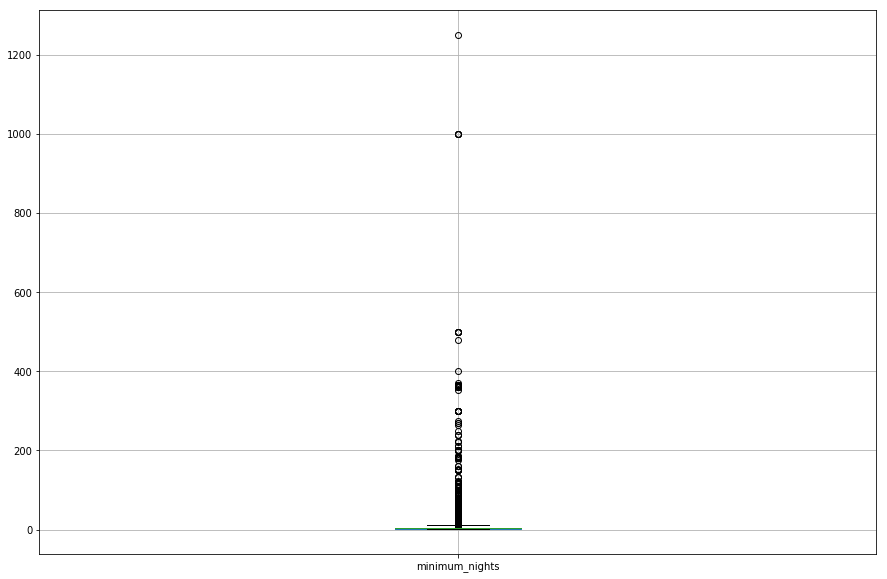

In [0]:
airbnb_limpo.boxplot(['minimum_nights'])

In [0]:
airbnb_limpo.minimum_nights.describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

Podemos notar que existem 'outliers' nessa variável, não é de se esperar um máximo de 1250 noites para uma estadia em um Airbnb. 
Vamos fazer uma análise a mais: conhecendo o perfil da base, seria interessante notar se o mínimo de noites pode ter alguma relação com outra variável como tipo de quarto. É de se esperar que para moradias maiores o tempo de estadia possa ser maior. 
Portanto para tratar esses dados vamos fazer a analise considerando a dimensão tipo de quarto também.

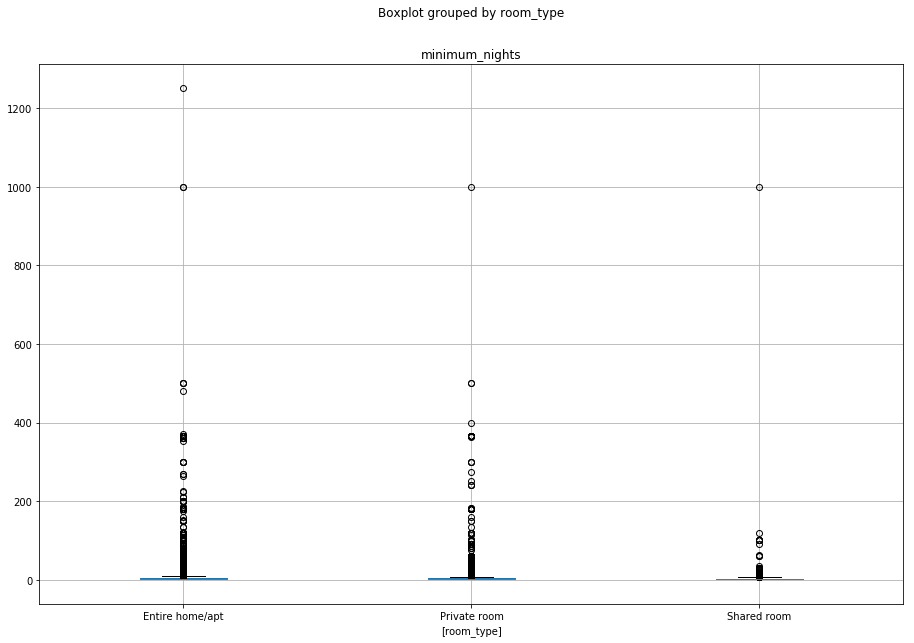

In [0]:
airbnb_limpo.boxplot(['minimum_nights'], by = ['room_type'])

Vamos utilizar a regra do intervalo interquatílico para limpar os outliers desse campo, em relação ao tipo de quarto, para facilitar a analise.

In [0]:
grupo_tipo = airbnb_limpo.groupby('room_type')['minimum_nights']
Q1 = grupo_tipo.quantile(.25).round(2)
Q3 = grupo_tipo.quantile(.75).round(2)
IIQ = (Q3 - Q1).round(2)
limite_inferior = (Q1 - 1.5*IIQ).round(2)
limite_superior = (Q3 + 1.5*IIQ).round(2)

In [0]:
dados_minimo_noites = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = airbnb_limpo['room_type'] == tipo
    eh_dentro_limite = (airbnb_limpo['minimum_nights'] >= limite_inferior[tipo]) & (airbnb_limpo['minimum_nights'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = airbnb_limpo[selecao]
    dados_minimo_noites = pd.concat([dados_minimo_noites, dados_selecao])

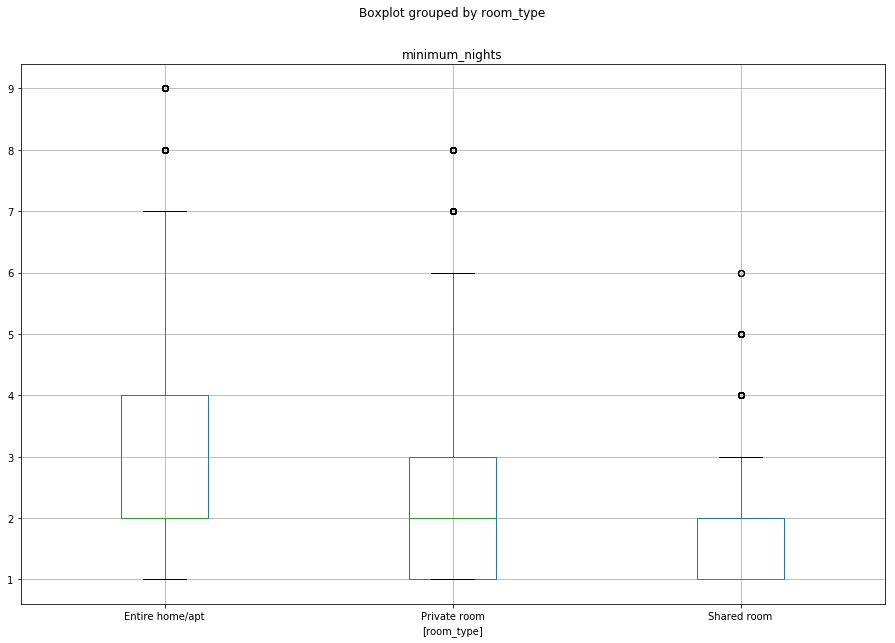

In [0]:
dados_minimo_noites.boxplot(['minimum_nights'], by = ['room_type'])

In [0]:
dados_minimo_noites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41707 entries, 1 to 48893
Data columns (total 14 columns):
id                                41707 non-null int64
host_id                           41707 non-null int64
neighbourhood_group               41707 non-null object
neighbourhood                     41707 non-null object
latitude                          41707 non-null float64
longitude                         41707 non-null float64
room_type                         41707 non-null object
price                             41707 non-null int64
minimum_nights                    41707 non-null int64
number_of_reviews                 41707 non-null int64
last_review                       41707 non-null object
reviews_per_month                 41707 non-null float64
calculated_host_listings_count    41707 non-null int64
availability_365                  41707 non-null int64
dtypes: float64(3), int64(7), object(4)
memory usage: 4.8+ MB


Agora com a base limpa, podemos verificar os dados de quantidade minima de noites sem os outliers. E conforme o esperado, tempos um tempo minimo desejado maior para a moradia completa.

### Variável Preço

Vamos realizar a mesma analise para o campo preço, e faremos a mesma tecnica para limpar os outliers caso existam. Assim podemos ter uma visão menos distorcida dos valores. 

In [0]:
airbnb_limpo.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

Podemos notar a existência de outliers, não é de se esperar um quarto com o preço zero, ou ainda 10.000 a noite. 

Para o caso do preço, é natural que se imagine que os preços médios possam variar por distrito. Portanto, afim de uma analise mais apurada vamos considerar o par price x neighbourhood_group.

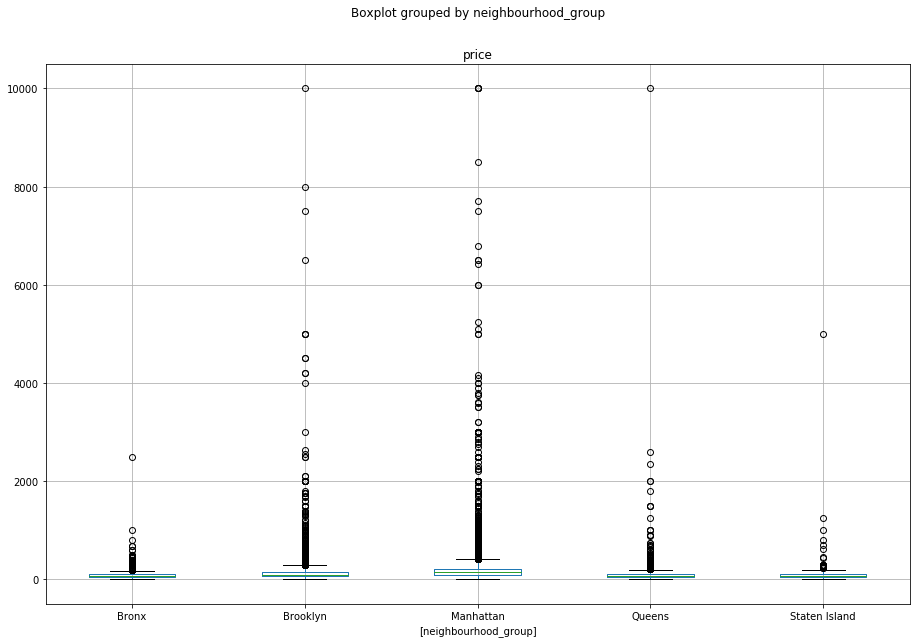

In [0]:
airbnb_limpo.boxplot(['price'], by = ['neighbourhood_group'])

Manhatam tem o preço mais disperso, o que é de se esperar dado o perfil do local.

In [0]:
grupo_bairro = airbnb_limpo.groupby('neighbourhood_group')['price']
Q1 = grupo_bairro.quantile(.25).round(2)
Q3 = grupo_bairro.quantile(.75).round(2)
IIQ = (Q3 - Q1).round(2)
LI = (Q1 - 1.5*IIQ).round(2)
LS = (Q3 + 1.5*IIQ).round(2)
bairro_novo_price = pd.DataFrame()
for tipo in grupo_bairro.groups.keys():
    eh_tipo = airbnb['neighbourhood_group'] == tipo
    eh_dentro_limite = (airbnb_limpo['price'] >= LI[tipo]) & (airbnb_limpo['price'] <= LS[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = airbnb_limpo[selecao]
    bairro_novo_price = pd.concat([bairro_novo_price, dados_selecao])

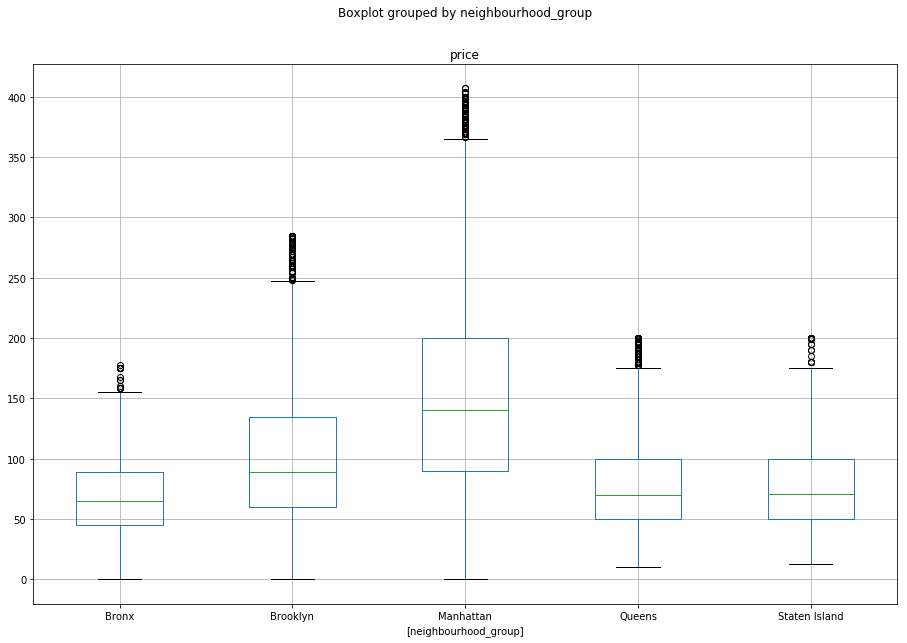

In [0]:
bairro_novo_price.boxplot(['price'], by = ['neighbourhood_group'])

### Latitude/Longitude - Coordenadas

Por último vamos analisar as variáveis de latitude e longitude. Para isso, vamos usar a figura do mapa de NYC para auxiliar a plotagem dos pontos.

In [0]:
airbnb_limpo[['latitude', 'longitude']].describe()

,latitude,longitude
count,48895.000000,48895.000000
mean,40.728949,-73.952170
std,0.054530,0.046157
min,40.499790,-74.244420
25%,40.690100,-73.983070
50%,40.723070,-73.955680
75%,40.763115,-73.936275
max,40.913060,-73.712990


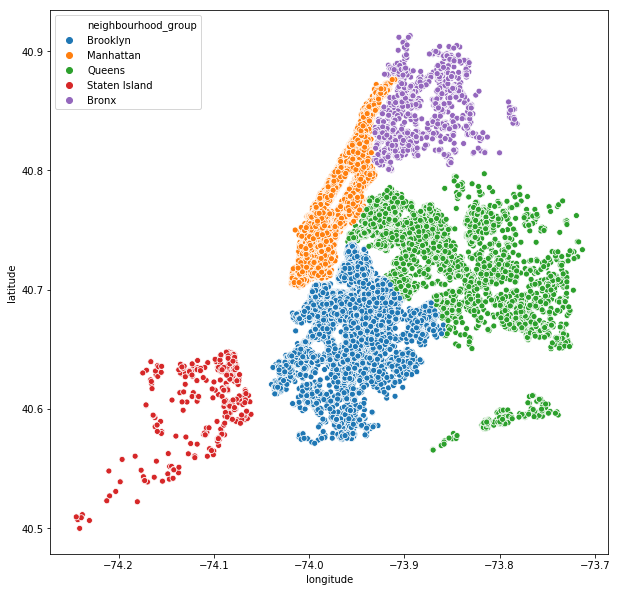

In [0]:
plt.figure(figsize=(10,10))
sns.scatterplot(airbnb_limpo.longitude,airbnb_limpo.latitude,hue=airbnb_limpo.neighbourhood_group)
plt.ioff()

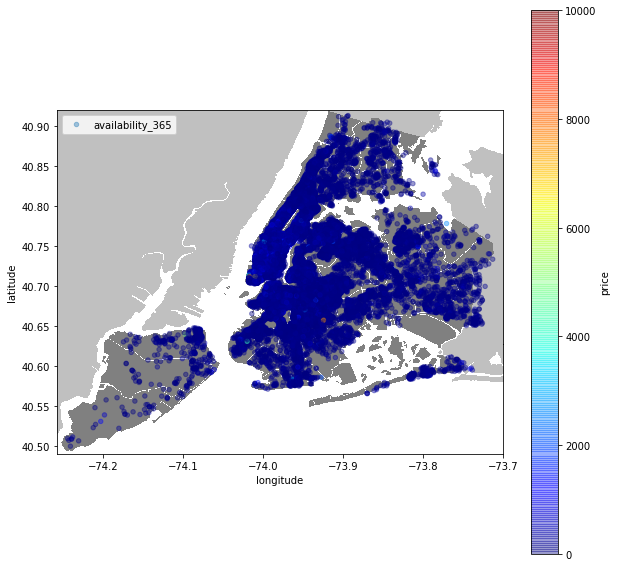

In [0]:
# Código utilizando informação do Kagle (desafio - )

import urllib
plt.figure(figsize=(10,10))
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#determinar a escala da figura de acordo com os limites de latitude e longitude
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

airbnb_limpo.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

Pela plotagem das imagens, notamos que não existe dados estranhos nessa variável, ou seja, todas as latitudes e longitudes apontam para pontos reais dentro da cidade de NYC.

# Analises por demografia Distritos

### Questão 3

Para fazer as análises dos dados referentes as regiões e demografia dos distritos de NYC vamos utilizar uma tabela de dados complementar ('https://en.wikipedia.org/wiki/Boroughs_of_New_York_City')

In [0]:
 extra = {
    'neighbourhood_group' : ['Bronx','Brooklyn','Manhattan','Queens','Staten Island'],
    'population' : [1471160, 2648771, 1664727, 2358582, 479458],
    'gdp' : [28787, 63303, 629682, 73842, 11249],
    'land_area' : [42.10, 70.82, 22.83, 108.53, 58.37],
    'density' : [34653, 37137, 72033, 21460, 8112]
}
demografia = pd.DataFrame(data=extra)

In [0]:
demografia

,neighbourhood_group,population,gdp,land_area,density
0,Bronx,1471160,28787,42.10,34653
1,Brooklyn,2648771,63303,70.82,37137
2,Manhattan,1664727,629682,22.83,72033
3,Queens,2358582,73842,108.53,21460
4,Staten Island,479458,11249,58.37,8112


In [0]:
distribuicao_distrito = airbnb_limpo.groupby(['neighbourhood_group']).count()['id'].reset_index()

In [0]:
distribuicao_cross = distribuicao_distrito.merge(demografia, how='left')

In [0]:
distribuicao_cross

,neighbourhood_group,id,population,gdp,land_area,density
0,Bronx,1091,1471160,28787,42.10,34653
1,Brooklyn,20104,2648771,63303,70.82,37137
2,Manhattan,21661,1664727,629682,22.83,72033
3,Queens,5666,2358582,73842,108.53,21460
4,Staten Island,373,479458,11249,58.37,8112


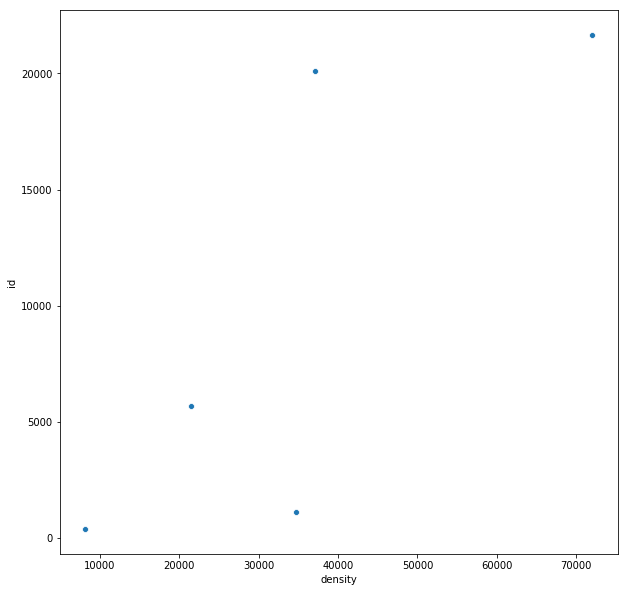

In [0]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='density', y='id', data=distribuicao_cross)

A densidade populacional da região indica ter uma relação direta com a oferta de imóveis. Vamos analisar a distribuição desses imóveis

In [0]:
distribuicao_anuncios = airbnb_limpo.groupby(['neighbourhood_group','room_type']).count()['id'].reset_index()

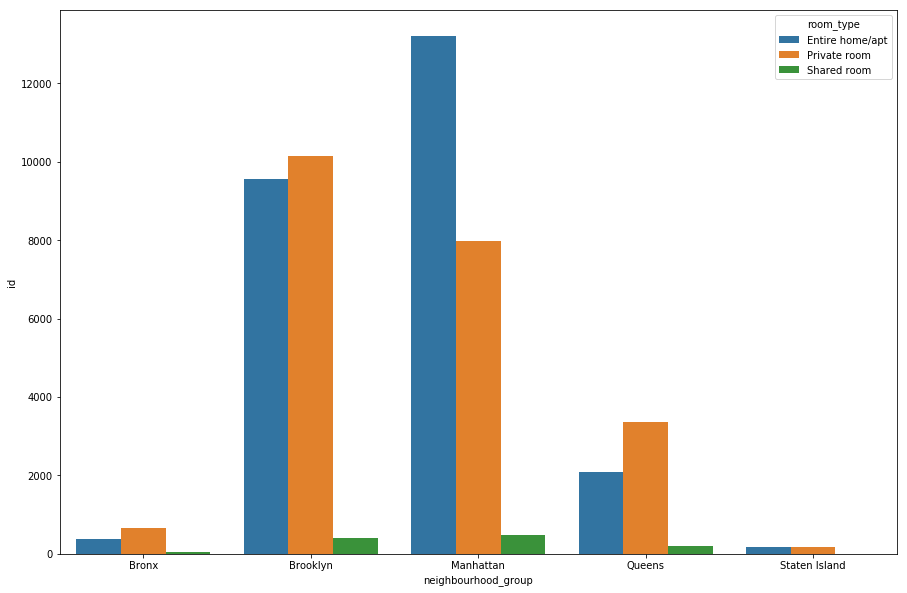

In [0]:
sns.barplot(x='neighbourhood_group', y='id', hue='room_type', data = distribuicao_anuncios)

Analisando a oferta pela distribuição dos distritos, podemos notar que os dois distritos com a maior densidade populacional também são os distritos com a maior quantidade de oferta de moradias.

Vamos analisar a proporção da distribiução de tipos de moradia pelo total de oferta do bairro.

In [0]:
distribuicao_anuncios['prop']=distribuicao_anuncios.groupby('neighbourhood_group')['id'].apply(lambda x: x/np.sum(x))

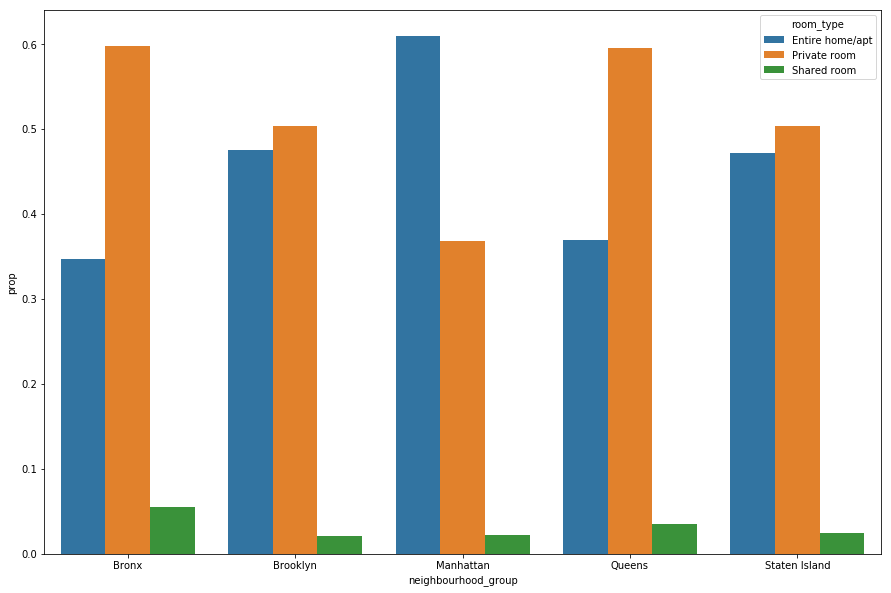

In [0]:
sns.barplot(x='neighbourhood_group', y='prop', hue='room_type', data = distribuicao_anuncios)

Conhecendo o perfil dos distritos, é de se imaginar que a oferta de apartamentos inteiros seja maior em Manhatan. Distrito mais central, com moradias menores inviabilizam a divisão da moradia para locação. A oferta de quartos dividios não é muito expressiva em nenhuma região.

# Analise dos Bairros

Agora vamos analisar a distribuição dos bairros mais 'requisitados'. Para isso considerei 3 variáveis para analisar, disponibilidade, total de avaliações e avaliações por mês. Usei um group sort apenas para verificar os 5 mais e os 5 menos requisitados. 

### Questão 4

In [0]:
disponibilidade_regiao = airbnb_limpo.groupby(['neighbourhood']).sum()['availability_365'].reset_index()
disponibilidade_regiao.sort_values(by=['availability_365'], ascending = False).head(5)

,neighbourhood,availability_365
13,Bedford-Stuyvesant,433181
214,Williamsburg,292913
94,Harlem,283283
95,Hell's Kitchen,271862
127,Midtown,243652


In [0]:
avaliacoes_por_mes = airbnb_limpo.groupby(['neighbourhood']).sum()['reviews_per_month'].reset_index()
avaliacoes_por_mes.sort_values(by=['reviews_per_month'], ascending = False).head(5)

,neighbourhood,reviews_per_month
13,Bedford-Stuyvesant,4874.52
214,Williamsburg,3475.77
94,Harlem,2956.23
95,Hell's Kitchen,2818.79
28,Bushwick,2632.51


In [0]:
avaliacoes_por_mes = airbnb_limpo.groupby(['neighbourhood']).sum()['number_of_reviews'].reset_index()
avaliacoes_por_mes.sort_values(by=['number_of_reviews'], ascending = False).head(5)

,neighbourhood,number_of_reviews
13,Bedford-Stuyvesant,110352
214,Williamsburg,85427
94,Harlem,75962
28,Bushwick,52514
95,Hell's Kitchen,50227


In [0]:
quantidade_por_host = airbnb_limpo.groupby(['neighbourhood']).sum()['calculated_host_listings_count'].reset_index()
quantidade_por_host.sort_values(by=['calculated_host_listings_count'], ascending = False).head(5)

,neighbourhood,calculated_host_listings_count
73,Financial District,85454
137,Murray Hill,26125
95,Hell's Kitchen,25169
127,Midtown,25019
191,Theater District,18704


Verificando as tres variáveis, podemos notar que os bairros que tem maior quantidade de avaliações assim como maior disponibilidade sao os mesmos:

**Bedford-Stuyvesant**, **Williamsburg**, **Harlem**, **Bushwick**, **Hell's Kitchen**

In [0]:
avaliacoes_por_mes = airbnb_limpo.groupby(['neighbourhood']).sum()['number_of_reviews'].reset_index()
avaliacoes_por_mes.sort_values(by=['number_of_reviews'], ascending = False).tail(5)

,neighbourhood,number_of_reviews
21,Breezy Point,5
9,"Bay Terrace, Staten Island",3
141,New Dorp,0
219,Woodrow,0
82,Fort Wadsworth,0


In [0]:
avaliacoes_por_mes = airbnb_limpo.groupby(['neighbourhood']).sum()['reviews_per_month'].reset_index()
avaliacoes_por_mes.sort_values(by=['reviews_per_month'], ascending = False).tail(5)

,neighbourhood,reviews_per_month
42,Co-op City,0.49
21,Breezy Point,0.44
141,New Dorp,0.00
82,Fort Wadsworth,0.00
219,Woodrow,0.00


In [0]:
disponibilidade_regiao = airbnb_limpo.groupby(['neighbourhood']).sum()['availability_365'].reset_index()
disponibilidade_regiao.sort_values(by=['availability_365'], ascending = False).tail(5)

,neighbourhood,availability_365
211,Westerleigh,225
172,Rossville,59
9,"Bay Terrace, Staten Island",0
141,New Dorp,0
219,Woodrow,0


In [0]:
quantidade_por_host = airbnb_limpo.groupby(['neighbourhood']).sum()['calculated_host_listings_count'].reset_index()
quantidade_por_host.sort_values(by=['calculated_host_listings_count'], ascending = False).tail(5)

,neighbourhood,calculated_host_listings_count
208,West Farms,2
172,Rossville,1
165,Richmondtown,1
219,Woodrow,1
141,New Dorp,1


In [0]:
bairros_menos_procurados = ['Woodrow', 'New Dorp' ,'Bay Terrace, Staten Island', 'Rossville', 'Westerleigh','Co-op City','Breezy Point','Bay Terrace, Staten Island']
selecao = airbnb_limpo['neighbourhood'].isin(bairros_menos_procurados)
airbnb_menors = airbnb[selecao]

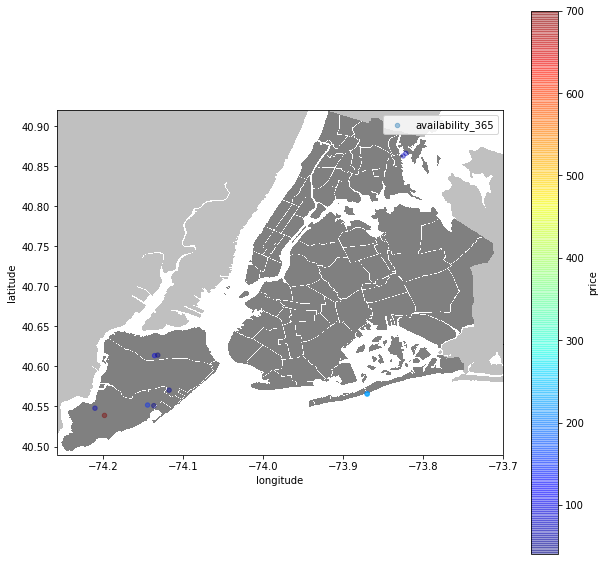

In [0]:
plt.figure(figsize=(10,10))
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#determinar a escala da figura de acordo com os limites de latitude e longitude
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

airbnb_menors.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [0]:
bairros_mais_procurados = ['Bedford-Stuyvesant', 'Williamsburg, Harlem', 'Bushwick', "Hell's Kitchen"]
selecao = airbnb_limpo['neighbourhood'].isin(bairros_mais_procurados)
airbnb_majors = airbnb[selecao]

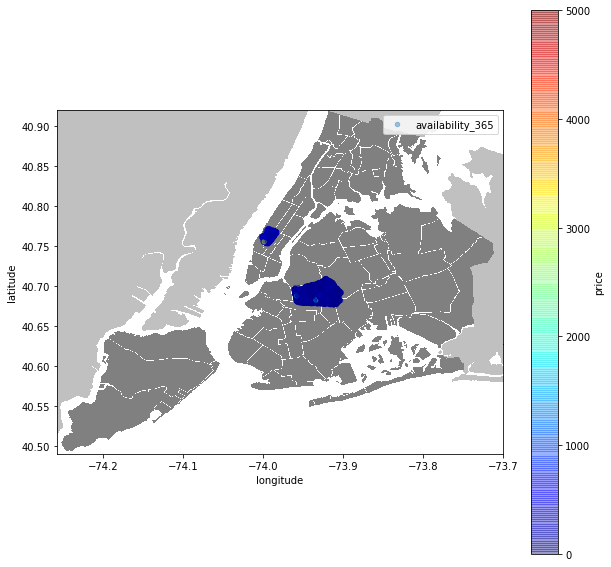

In [0]:
plt.figure(figsize=(10,10))
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#determinar a escala da figura de acordo com os limites de latitude e longitude
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

airbnb_majors.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

Podemos notar que as localizações mais procuradas são localizações com um grande fluxo de turistas (região do brookling revitalizado e manhatan central (midtown)), enquanto regiões periféricas possuem um menor acumulo de oferta.

Considerando que os bairros com maior demanda possuem um maior apelo turístico, poderiamos começar por fazer uma campanha para valorizar as qualidades dos bairros, adicionar pontos turísticos, atrações locais, lugares para se visitar.

Em paralelo, poderíamos incentivar os hosts a convidarem mais hosts bonificando cada cadastro e/ou primeira reserva.

# Hosts com maior faturamento

### Questão 5

Considerando os Hosts, vamos usar o host_id.
Para analisar os hosts com o maior faturamento, devemos analisar algumas variáveis além de preço.
Vamos supor que todos os imóveis tem a mesma taxa de reviews por reserva, ou seja a cada x reservas temos um numero y de reviews.
Se essa taxa for igual para todos os imóveis, podemos considerar que o numero de reviews pode nos dar um estimador de quantas reservas são feitas.
Dessa forma podemos calcular o 'ganho' anual com uma aproximação de preço da oferta pela quantidade de reviews por mês, em 12 meses.

In [0]:
airbnb_limpo['anual_income'] = airbnb_limpo['reviews_per_month']*airbnb_limpo['price']*12

In [0]:
airbnb_host = airbnb_limpo.query('number_of_reviews > 0')

In [0]:
airbnb_host.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,anual_income
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,375.48
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1026.00
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,4955.52
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,96.00
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,1416.00


In [0]:
airbnb_host.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,anual_income
count,3.884300e+04,3.884300e+04,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000,38843.000000
mean,1.809646e+07,6.423915e+07,40.728134,-73.951148,142.317947,5.868059,29.297557,1.373221,5.164457,114.882888,2223.651691
std,1.069370e+07,7.588847e+07,0.054990,0.046695,196.945624,17.384784,48.186374,1.680442,26.295665,129.543636,4657.673094
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000
25%,8.720027e+06,7.033824e+06,40.688640,-73.982470,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000,240.120000
50%,1.887146e+07,2.837193e+07,40.721710,-73.954800,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000,899.640000
75%,2.755482e+07,1.018465e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000,2718.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,553500.000000


In [0]:
host_anual_income = airbnb_host.groupby(['host_id']).sum()['anual_income'].reset_index()

In [0]:
host_anual_income.sort_values(by=['anual_income'], ascending = False).head(10)

,host_id,anual_income
28219,219517861,1351892.76
29857,262534951,554637.60
29173,244361589,180839.52
27705,205031545,179826.00
28448,224414117,164489.28
25846,152228055,156436.80
29174,244370442,119259.24
26238,159610596,110751.00
30099,266992480,108000.00
17125,35524316,89338.20


In [0]:
teste_hosts = host_anual_income.sort_values(by=['anual_income'], ascending = False).head(10)['host_id']

In [0]:
teste_hosts

28219    219517861
29857    262534951
29173    244361589
27705    205031545
28448    224414117
25846    152228055
29174    244370442
26238    159610596
30099    266992480
17125     35524316
Name: host_id, dtype: int64

In [0]:
selecao = airbnb_host['host_id'].isin(teste_hosts)
airbnb_value = airbnb_host[selecao]

In [0]:
airbnb_value.describe()[['price','number_of_reviews','calculated_host_listings_count','availability_365']]

,price,number_of_reviews,calculated_host_listings_count,availability_365
count,304.000000,304.000000,304.000000,304.000000
mean,344.082237,15.401316,231.789474,276.026316
std,473.214591,35.854999,139.668591,78.413219
min,60.000000,1.000000,1.000000,1.000000
25%,205.000000,3.000000,49.000000,239.250000
50%,235.000000,6.000000,327.000000,299.000000
75%,393.000000,10.000000,327.000000,337.000000
max,7500.000000,203.000000,327.000000,365.000000


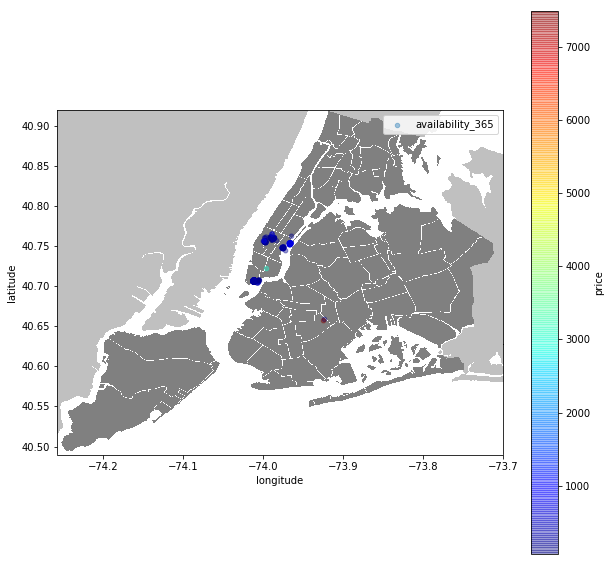

In [0]:
plt.figure(figsize=(10,10))
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#determinar a escala da figura de acordo com os limites de latitude e longitude
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

airbnb_value.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [0]:
airbnb_value.describe()[['price','number_of_reviews','calculated_host_listings_count','availability_365']]

,price,number_of_reviews,calculated_host_listings_count,availability_365
count,304.000000,304.000000,304.000000,304.000000
mean,344.082237,15.401316,231.789474,276.026316
std,473.214591,35.854999,139.668591,78.413219
min,60.000000,1.000000,1.000000,1.000000
25%,205.000000,3.000000,49.000000,239.250000
50%,235.000000,6.000000,327.000000,299.000000
75%,393.000000,10.000000,327.000000,337.000000
max,7500.000000,203.000000,327.000000,365.000000


In [0]:
airbnb_limpo.describe()[['price','number_of_reviews','calculated_host_listings_count','availability_365']]

,price,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,23.274466,7.143982,112.781327
std,240.154170,44.550582,32.952519,131.622289
min,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.000000
50%,106.000000,5.000000,1.000000,45.000000
75%,175.000000,24.000000,2.000000,227.000000
max,10000.000000,629.000000,327.000000,365.000000


Podemos notar que os hosts com o **maior faturamento** se encontram na **região de Manhatan**, tem um **valor por imóvel bem acima da média da base**, assim como uma **maior quantidade de imóveis cadastrados**. Aumentando o faturamento.

# Novos Hosts


### Questão 6

In [0]:
airbnb_novos = airbnb_limpo.query('number_of_reviews == 0')

In [0]:
airbnb_novos_mh = airbnb_novos.loc[(airbnb_novos['neighbourhood_group'].astype(str).str.contains("Manhattan"))]

In [0]:
selecao = airbnb_novos_mh['neighbourhood'].isin(bairros_mais_procurados)
airbnb_novos_mh_bairros = airbnb_novos_mh[selecao]

In [0]:
airbnb_novos_mh_bairros =airbnb_novos_mh_bairros.query('calculated_host_listings_count == 1')

In [0]:
airbnb_novos_mh_bairros.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,anual_income
count,2.560000e+02,2.560000e+02,256.000000,256.000000,256.000000,256.000000,256.0,256.0,256.0,256.000000,256.0
mean,2.088634e+07,8.134185e+07,40.762070,-73.991668,249.597656,7.246094,0.0,0.0,1.0,50.613281,0.0
std,1.220018e+07,9.025017e+07,0.004013,0.003774,260.855993,26.438497,0.0,0.0,0.0,99.425738,0.0
min,4.742830e+05,5.168770e+05,40.753510,-74.000330,15.000000,1.000000,0.0,0.0,1.0,0.000000,0.0
25%,9.795675e+06,1.445613e+07,40.759295,-73.994252,125.000000,1.000000,0.0,0.0,1.0,0.000000,0.0
50%,1.959135e+07,4.109666e+07,40.762455,-73.991665,190.000000,2.000000,0.0,0.0,1.0,0.000000,0.0
75%,3.503359e+07,1.341486e+08,40.764880,-73.988933,286.000000,4.000000,0.0,0.0,1.0,41.750000,0.0
max,3.648724e+07,2.743213e+08,40.771570,-73.983880,2999.000000,360.000000,0.0,0.0,1.0,365.000000,0.0


In [0]:
airbnb_novos_mh_bairros =airbnb_novos_mh_bairros.query('availability_365 == 0')

In [0]:
airbnb_novos_mh_bairros.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,anual_income
count,1.610000e+02,1.610000e+02,161.000000,161.000000,161.000000,161.000000,161.0,161.0,161.0,161.0,161.0
mean,1.409822e+07,4.309624e+07,40.761729,-73.991325,208.844720,3.546584,0.0,0.0,1.0,0.0,0.0
std,8.613329e+06,5.158258e+07,0.003947,0.003804,164.385011,4.937042,0.0,0.0,0.0,0.0,0.0
min,4.742830e+05,5.168770e+05,40.753610,-73.999780,30.000000,1.000000,0.0,0.0,1.0,0.0,0.0
25%,7.632128e+06,1.015848e+07,40.759000,-73.994040,105.000000,1.000000,0.0,0.0,1.0,0.0,0.0
50%,1.238849e+07,2.511143e+07,40.762080,-73.991430,175.000000,2.000000,0.0,0.0,1.0,0.0,0.0
75%,1.962654e+07,5.152201e+07,40.764700,-73.988490,250.000000,4.000000,0.0,0.0,1.0,0.0,0.0
max,3.616976e+07,2.413670e+08,40.769090,-73.983880,1450.000000,36.000000,0.0,0.0,1.0,0.0,0.0


Para analisar os novos hosts, foi considerado os indicadores com **menores índices** dentro dos **bairros mais procurados**.
Hosts nos bairros mais procurados, com **availability = 0**, **sem recomendações**, e com o **número de cadastros igual a 1**, como estão em uma região de grande procura, provavelmente são novos usuários na plataforma.

In [0]:
escolha = [950232, 4022922]

In [0]:
airbnb_novos_mh_bairros

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,anual_income
1119,474283,950232,Manhattan,Hell's Kitchen,40.76487,-73.98471,Entire home/apt,117,7,0,0,0.0,1,0,0.0
1691,766814,4022922,Manhattan,Hell's Kitchen,40.75900,-73.99530,Entire home/apt,95,1,0,0,0.0,1,0,0.0
3267,1950318,10074602,Manhattan,Hell's Kitchen,40.76435,-73.99054,Entire home/apt,200,5,0,0,0.0,1,0,0.0
3451,2070290,10585956,Manhattan,Hell's Kitchen,40.76874,-73.98757,Entire home/apt,599,1,0,0,0.0,1,0,0.0
3514,2101710,10717291,Manhattan,Hell's Kitchen,40.76204,-73.99143,Entire home/apt,175,1,0,0,0.0,1,0,0.0
3635,2185842,6910298,Manhattan,Hell's Kitchen,40.76000,-73.99009,Entire home/apt,850,1,0,0,0.0,1,0,0.0
3752,2257080,3312524,Manhattan,Hell's Kitchen,40.75361,-73.99501,Entire home/apt,350,1,0,0,0.0,1,0,0.0
3808,2294663,6509406,Manhattan,Hell's Kitchen,40.75786,-73.99485,Entire home/apt,800,1,0,0,0.0,1,0,0.0
3816,2298759,11741773,Manhattan,Hell's Kitchen,40.76774,-73.98503,Entire home/apt,425,1,0,0,0.0,1,0,0.0
4352,2925138,14935685,Manhattan,Hell's Kitchen,40.76761,-73.98497,Entire home/apt,250,1,0,0,0.0,1,0,0.0


In [0]:
selecao = airbnb['host_id'].isin(escolha)
hosts = airbnb[selecao]

In [0]:
hosts

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1119,474283,Studio apartment by Columbus Circle,950232,Deborah,Manhattan,Hell's Kitchen,40.76487,-73.98471,Entire home/apt,117,7,0,0,0.0,1,0
1691,766814,Adorable Midtown West Studio!,4022922,Caitlin,Manhattan,Hell's Kitchen,40.75900,-73.99530,Entire home/apt,95,1,0,0,0.0,1,0


Poderiamos auxiliar os hosts com uma campanha para **tirar boas fotos dos imóveis** com alguns profissionais da área, auxiliar os hosts a se **tornarem superhosts**, auxiliar na **criação de vídeos para divulgação dos benefícios de se hospedar com esses hosts**.
Ainda poderiamos incentivar a **divulgação dos imóveis bonificando os host após a primeira reserva**. 
